In [1]:
# Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import re 

In [2]:
# CSV-Datei mit Semikolon als Trennzeichen lesen
df = pd.read_csv('data.csv', sep=';')
df.rename(columns=lambda x: re.sub(r'\W+', ' ', x).strip(), inplace=True)
# Die ersten fünf Zeilen anzeigen
df.head()
df.shape

(4424, 37)

In [3]:

# Überprüfen, welche Werte NaN sind (True = NaN, False = kein NaN)
print(df.isna().sum().sum())

0


In [4]:
# Überprüfung aller fehlenden Werte in einem Befehl
missing_values = df.isnull() | df.eq('') | df.eq('None') | df.eq('null') | df.eq('?') | df.eq('-') | df.eq('N/A') | df.eq('unknown')
# Anzahl der fehlenden Werte pro Spalte
missing_values.sum()
# Summe aller fehlenden Werte im gesamten DataFrame
missing_values.sum().sum()
# Zeige alle Zeilen, die mindestens einen fehlenden Wert haben
print(df[missing_values.any(axis=1)])

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime evening attendance, Previous qualification, Previous qualification grade, Nacionality, Mother s qualification, Father s qualification, Mother s occupation, Father s occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem credited, Curricular units 1st sem enrolled, Curricular units 1st sem evaluations, Curricular units 1st sem approved, Curricular units 1st sem grade, Curricular units 1st sem without evaluations, Curricular units 2nd sem credited, Curricular units 2nd sem enrolled, Curricular units 2nd sem evaluations, Curricular units 2nd sem approved, Curricular units 2nd sem grade, Curricular units 2nd sem without evaluations, Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 37 columns]


In [5]:
#print(df.columns)
#print(df.dtypes)
print(df.dtypes.value_counts())
print(df.dtypes.unique())
for spalte in df.columns:
    if df.dtypes[spalte]=='object':

        print('spalte ist :', spalte)
object_spalten = df.select_dtypes(include='object').columns
print(object_spalten)
print(df.loc[:,'Target'])
print(df['Target'].unique())
df['Target'] = df['Target'].astype('category')
#
dezimal_liste=[]
for spalte in df.columns:
    if df.dtypes[spalte]=='float64':
        #print('spalte ist Dezimal:', spalte)
        dezimal_liste.append(spalte)
print(dezimal_liste)
# Schleife, um die angegebenen Spalten in 'int64' umzuwandeln
umwandeln_Liste = ['Age at enrollment', 'Curricular units 1st sem grade', 'Curricular units 2nd sem credited']

for spalte in umwandeln_Liste:
    if spalte in df.columns:  # Überprüfen, ob die Spalte im DataFrame existiert
        df[spalte] = df[spalte].astype('int64')

# Die Datentypen der umgewandelten Spalten anzeigen
print(df[umwandeln_Liste].dtypes)
###################################################################################################################################################
print(df.describe())

int64      29
float64     7
object      1
Name: count, dtype: int64
[dtype('int64') dtype('float64') dtype('O')]
spalte ist : Target
Index(['Target'], dtype='object')
0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object
['Dropout' 'Graduate' 'Enrolled']
['Previous qualification grade', 'Admission grade', 'Curricular units 1st sem grade', 'Curricular units 2nd sem grade', 'Unemployment rate', 'Inflation rate', 'GDP']
Age at enrollment                    int64
Curricular units 1st sem grade       int64
Curricular units 2nd sem credited    int64
dtype: object
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484

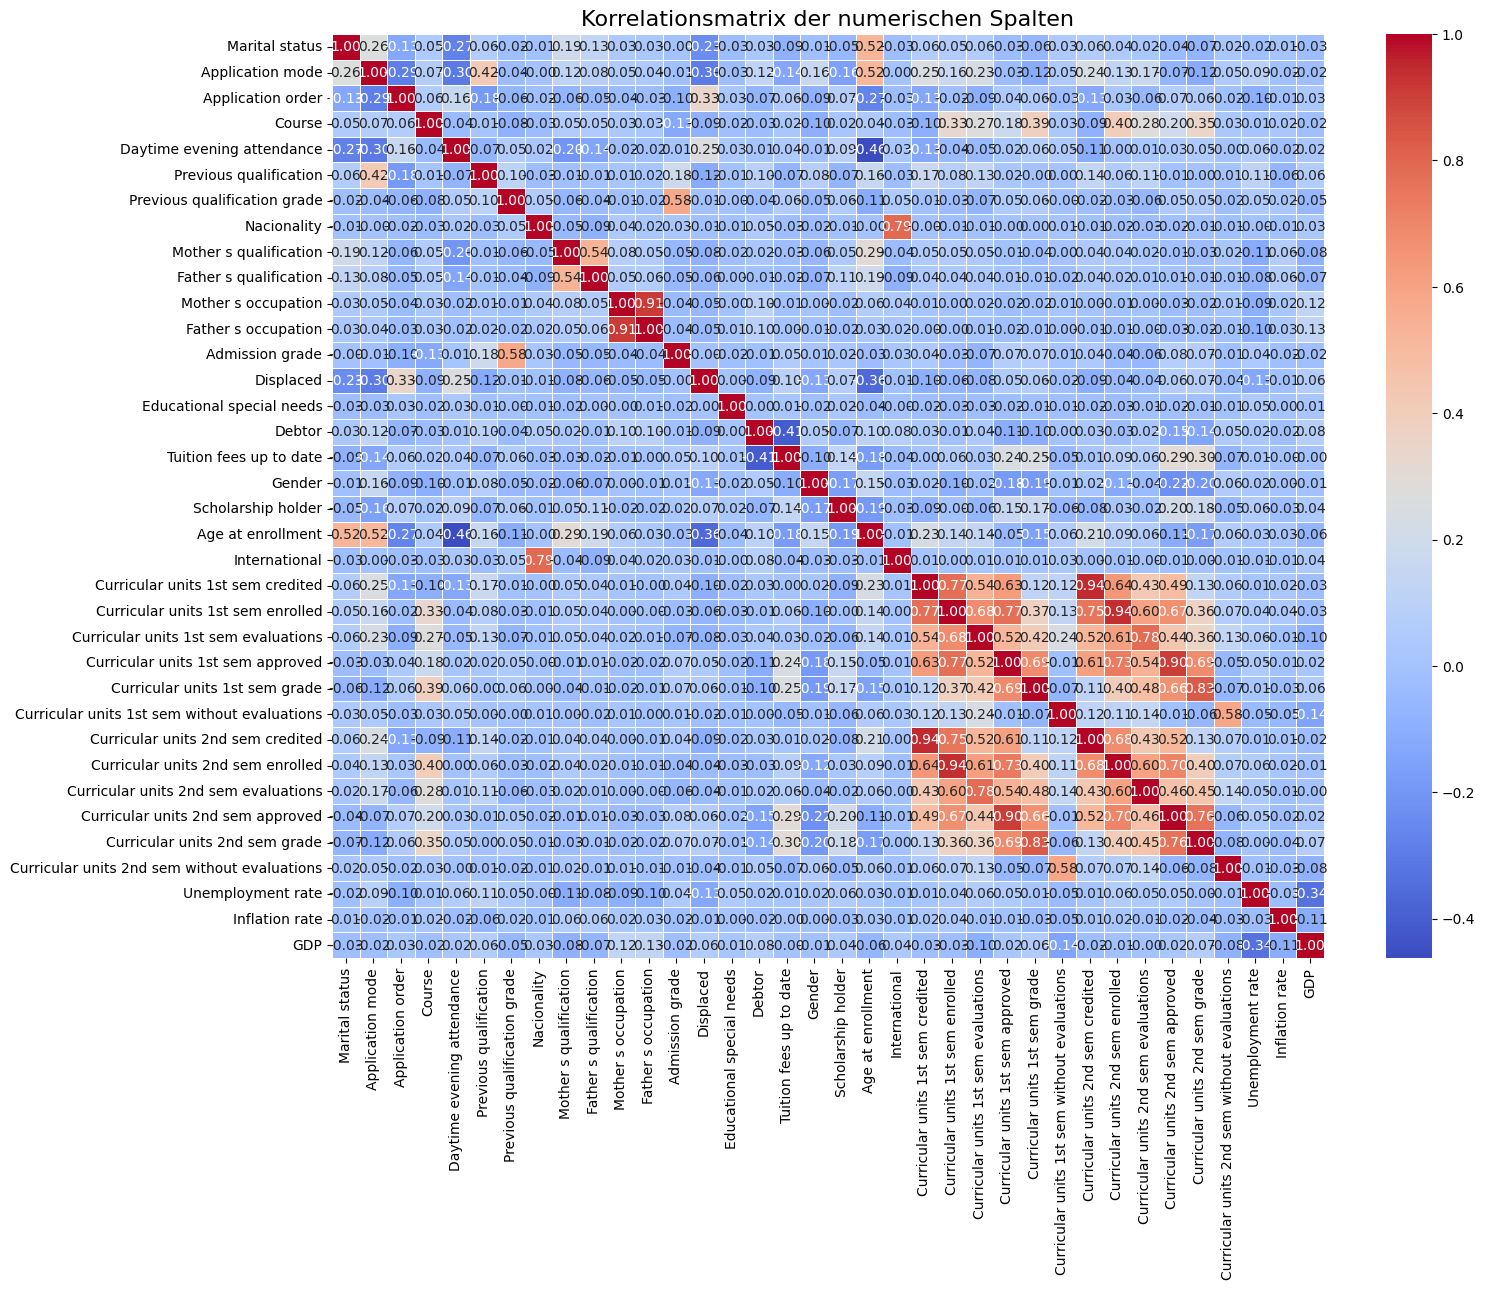

In [6]:
###############################################################################################################################################################
#Korrelation
# Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------- KORRELATIONSMATRIX VISUALISIEREN ----------------------------

# 1. Nur numerische Spalten auswählen
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()

# 2. Spalten mit Standardabweichung = 0 entfernen
df_numeric = df_numeric.loc[:, df_numeric.std(numeric_only=True) != 0]

# 3. Fehlende Werte mit dem Median auffüllen 
df_numeric = df_numeric.fillna(df_numeric.median())

# 4. Korrelationsmatrix berechnen
correlation_matrix = df_numeric.corr()

# 5. Heatmap visualisieren
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix der numerischen Spalten', fontsize=16)
plt.show()

## ---------------------------- STARKE KORRELATIONEN HERAUSFILTERN ----------------------------

## Schwellenwert für starke Korrelationen festlegen
#threshold = 0.8

## 1. Starke Korrelationen finden (ohne Diagonale)
#starke_korrelationen = [
    #(spalte1, spalte2, correlation_matrix.loc[spalte1, spalte2])
    #for spalte1 in correlation_matrix.columns
    #for spalte2 in correlation_matrix.columns
    #if spalte1 != spalte2 and abs(correlation_matrix.loc[spalte1, spalte2]) >= threshold
#]

## 2. Starke Korrelationen ausgeben (vereinfacht)
#print("\nStarke Korrelationen:" if starke_korrelationen else "\nKeine gefunden.")
#for spalte1, spalte2, corr in starke_korrelationen:
    #print(spalte1, spalte2, round(corr, 2))

## 3. Stark korrelierte Spalten löschen (jeweils die zweite aus jedem Paar)
#columns_to_drop = []
#for spalte1, spalte2, corr in starke_korrelationen:
    #if spalte2 not in columns_to_drop:
        #columns_to_drop.append(spalte2)  # Zweite Spalte wird gelöscht

## 4. Stark korrelierte Spalten entfernen
#df_numeric.drop(columns=columns_to_drop, inplace=True, errors='ignore')

## 5. Gelöschte Spalten anzeigen
#if columns_to_drop:
    #print("\nGelöschte Spalten:")
    #print(*sorted(columns_to_drop))

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime evening attendance', 'Previous qualification',
       'Previous qualification grade', 'Nacionality', 'Mother s qualification',
       'Father s qualification', 'Mother s occupation', 'Father s occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem credited',
       'Curricular units 1st sem enrolled',
       'Curricular units 1st sem evaluations',
       'Curricular units 1st sem approved', 'Curricular units 1st sem grade',
       'Curricular units 1st sem without evaluations',
       'Curricular units 2nd sem credited',
       'Curricular units 2nd sem enrolled',
       'Curricular units 2nd sem evaluations',
       'Curricular units 2nd sem approved', 'Curricular units 2nd sem grade',
       'Curricular units 2nd sem

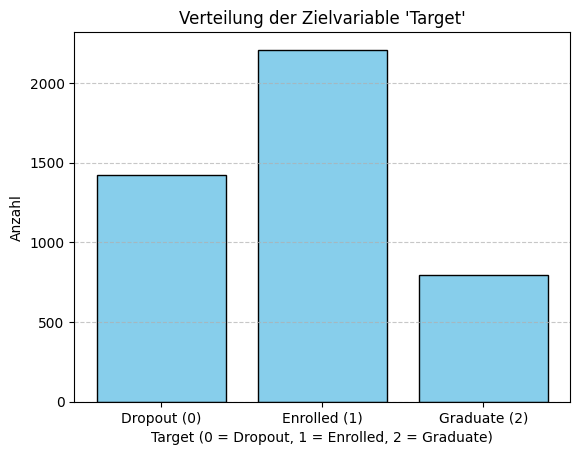

In [7]:

#######################################Zielvariable 'Target' analysieren###########################################
print(df.columns)
print(df['Target'].isna().sum())
print(df['Target'].unique())
#
# Prozentuale Verteilung anzeigen
print("\nVerteilung der Zielvariable 'Target':")
print(df['Target'].value_counts(normalize=True))  

# Histogramm plotten
plt.hist(df['Target'].dropna(), bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8, 
         color='skyblue', edgecolor='black')  
plt.title("Verteilung der Zielvariable 'Target'")
plt.xlabel("Target (0 = Dropout, 1 = Enrolled, 2 = Graduate)")
plt.ylabel("Anzahl")
plt.xticks([0, 1, 2], labels=["Dropout (0)", "Enrolled (1)", "Graduate (2)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()
###############################################################################################################

In [ ]:
from sklearn.model_selection import train_test_split

# Zielvariable und Features definieren
X = df.drop(columns=['Target'])
y = df.loc[:,'Target']

# Daten in Trainings- und Testdatensätze aufteilen
# Kemal: Test von 0.1 auf 0.2 geändert
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
###########################################################################################################

# 4. Testdaten speichern
features_test = pd.concat([X_test, y_test], axis=1)  # Test-Features mit Zielvariable zusammenfügen
features_test.to_csv('features_test.csv', index=False)  # CSV-Datei speichern
#
print("Testdaten wurden erfolgreich als 'features_test.csv' gespeichert.")
###########################################################################################################

Testdaten wurden erfolgreich als 'features_test.csv' gespeichert.


In [9]:

# Numerische und Kategorische Spalten identifizieren
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

print("Numerische Spalten:", numeric_columns)
print("Kategorische Spalten:", categorical_columns)
#################################################################################################

Numerische Spalten: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime evening attendance', 'Previous qualification',
       'Previous qualification grade', 'Nacionality', 'Mother s qualification',
       'Father s qualification', 'Mother s occupation', 'Father s occupation',
       'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem credited',
       'Curricular units 1st sem enrolled',
       'Curricular units 1st sem evaluations',
       'Curricular units 1st sem approved', 'Curricular units 1st sem grade',
       'Curricular units 1st sem without evaluations',
       'Curricular units 2nd sem credited',
       'Curricular units 2nd sem enrolled',
       'Curricular units 2nd sem evaluations',
       'Curricular units 2nd sem approved', 'Curricular units 2nd sem grade',
       'Curr

In [10]:
# Kopien von X_train und X_test erstellen, um Slices zu vermeiden
X_train = X_train.copy()
X_test = X_test.copy()
#################################################################################################

In [11]:
# Kategorische Spalten in 'category' umwandeln
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Ausgabe der Datentypen zur Überprüfung
print("Datentypen in X_train:")
print(X_train.dtypes)
print("\nDatentypen in X_test:")
print(X_test.dtypes)
##############################################################################################################
# Anzahl der unterschiedlichen Datentypen in X_train und X_test
print("Anzahl der unterschiedlichen Datentypen in X_train:", X_train.dtypes.nunique())
print("Anzahl der unterschiedlichen Datentypen in X_test:", X_test.dtypes.nunique())
####################################################################################################
# Namen und Häufigkeit der Datentypen in X_train
print("Datentypen in X_train:")
print(X_train.dtypes.value_counts())
# Namen und Häufigkeit der Datentypen in X_test
print("\nDatentypen in X_test:")
print(X_test.dtypes.value_counts())
################################################################################################################

Datentypen in X_train:
Marital status                                    int64
Application mode                                  int64
Application order                                 int64
Course                                            int64
Daytime evening attendance                        int64
Previous qualification                            int64
Previous qualification grade                    float64
Nacionality                                       int64
Mother s qualification                            int64
Father s qualification                            int64
Mother s occupation                               int64
Father s occupation                               int64
Admission grade                                 float64
Displaced                                         int64
Educational special needs                         int64
Debtor                                            int64
Tuition fees up to date                           int64
Gender                   

In [12]:
# Median für numerische Spalten berechnen
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
median_train = dict(X_train[numeric_columns].median())

#print("Median für numerische Spalten:", median_train)
#################################################################################################################
# 2. Modus für kategorische Spalten berechnen und anpassen
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
mode = X_train[categorical_columns].mode().to_dict()

# Modus-Dictionary anpassen
mode_train = {}
for category, inner_dict in mode.items():
    for key, value in inner_dict.items():
        mode_train[category] = value

#print("Modus für kategorische Spalten:", mode_train)
###################################################################################################################
# 3. Fehlende Werte ersetzen (Numerisch: Median, Kategorisch: Modus)
for col in numeric_columns:
    X_train[col] = X_train[col].fillna(median_train[col])
    X_test[col] = X_test[col].fillna(median_train[col])

for col in categorical_columns:
    X_train[col] = X_train[col].fillna(mode_train[col])
    X_test[col] = X_test[col].fillna(mode_train[col])

/Users/kemdo/Documents/Portfolio_Projekt/students/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


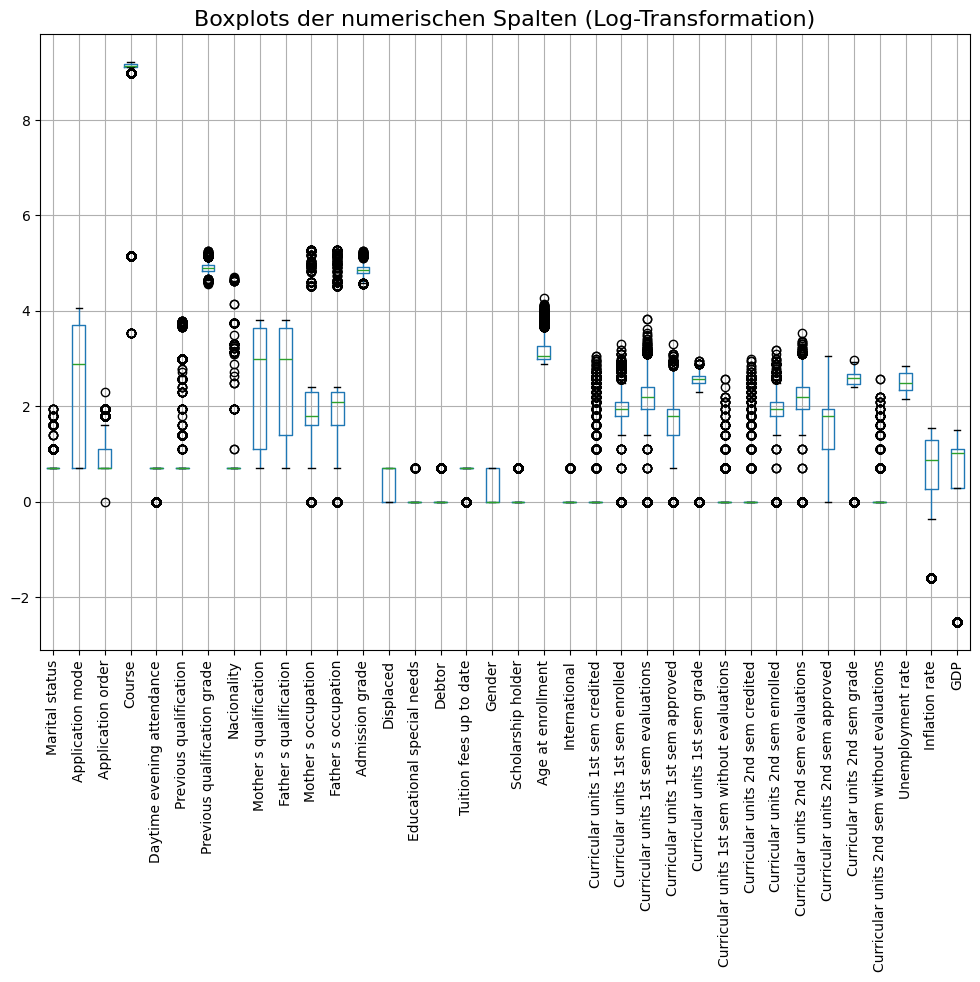


--- Ausreißeranalyse ---
MAD ist für Spalte Marital status 0. Ausreißeranalyse wird übersprungen.
Spalte Application mode: 0 Ausreißer gefunden.
MAD ist für Spalte Application order 0. Ausreißeranalyse wird übersprungen.
Spalte Course: 209 Ausreißer gefunden.
MAD ist für Spalte Daytime evening attendance 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte Previous qualification 0. Ausreißeranalyse wird übersprungen.
Spalte Previous qualification grade: 0 Ausreißer gefunden.
MAD ist für Spalte Nacionality 0. Ausreißeranalyse wird übersprungen.
Spalte Mother s qualification: 0 Ausreißer gefunden.
Spalte Father s qualification: 0 Ausreißer gefunden.
Spalte Mother s occupation: 165 Ausreißer gefunden.
Spalte Father s occupation: 162 Ausreißer gefunden.
Spalte Admission grade: 0 Ausreißer gefunden.
MAD ist für Spalte Displaced 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte Educational special needs 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte Debtor 0. Ausreiß

/Users/kemdo/Documents/Portfolio_Projekt/students/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


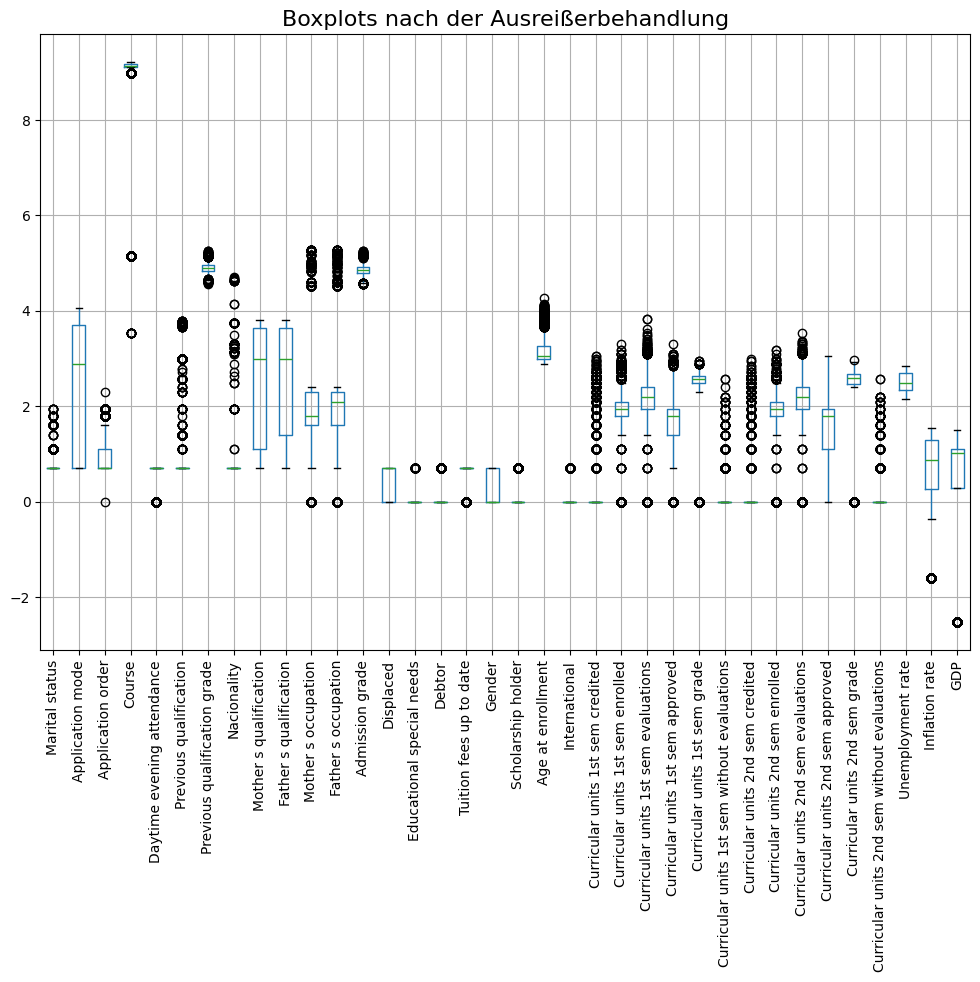

In [14]:
######Deal with Outliers############################################################################################################
import numpy as np
import pandas as pd
from statsmodels import robust
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)  # log1p = log(x+1) vermeidet log(0)
plt.title('Boxplots der numerischen Spalten (Log-Transformation)', fontsize=16)
plt.show()
#
#Ausreißer


def handle_outliers(data, numeric_columns, threshold=15):
    """
    Behandelt Ausreißer in den numerischen Spalten eines DataFrames.
    
    Args:
        df (pd.DataFrame): Der zu verarbeitende DataFrame.
        numeric_columns (list): Liste der numerischen Spalten.
        threshold (int): Schwellenwert für die MAD (Median Absolute Deviation).
        
    Returns:
        pd.DataFrame: Der DataFrame mit behandelten Ausreißern.
    """
    outlier_indices = set()  # Speichert die Indizes der Ausreißer
    print("\n--- Ausreißeranalyse ---")
    
    for col in numeric_columns:
        median = data[col].median()
        mad = robust.mad(data[col])
        
        if mad == 0:  # Wenn MAD 0 ist, überspringen
            print(f"MAD ist für Spalte {col} 0. Ausreißeranalyse wird übersprungen.")
            continue
        
        lower_bound = median - threshold * mad
        upper_bound = median + threshold * mad
        
        # Ausreißer identifizieren
        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Spalte {col}: {len(col_outliers)} Ausreißer gefunden.")
        
        # Ausreißer durch Median ersetzen
        data.loc[col_outliers.index, col] = median
        outlier_indices.update(col_outliers.index)
    
    # Statistik über Ausreißer
    total_outliers = len(outlier_indices)
    percentage_outliers = (total_outliers / len(data)) * 100
    print(f"\nGesamtanzahl der eindeutigen Ausreißer: {total_outliers}")
    print(f"Prozentsatz der Ausreißer: {percentage_outliers:.2f}%")
    
    return data
#
# Numerische Spalten identifizieren
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Ausreißer in X_train behandeln
X_train = handle_outliers(X_train, numeric_columns)
print("Ausreißer in X_train wurden behandelt.")
#
plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)
plt.title('Boxplots nach der Ausreißerbehandlung', fontsize=16)
plt.show()
###############################################################################################################################################

